Group Eleven Proposal:

Group members: Katie Archer, Noor Naila Imtinan Himam, Matthew Yeung



Title: 

<b>1. Introduction</b>
<br> - Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal 
<br> - Clearly state the question you will try to answer with your project
<br> - Identify and describe the dataset that will be used to answer the question

Pulsars are a rare type of neutron stars that blast out pulses of radiation, with intervals ranging from seconds to milliseconds. The strong magnetic fields of these neutron stars produce powerful beams of light from each end of the pole. As the pulsar rotates rapidly, the sightings of their beams occur periodically and can only be seen with large telescopes as they cross our line of sight here on Earth. 

The pulsar data set was obtained from a High Time Resolution Universe study of pulsar samples at the Parkes Observatory.
ok

<b>2. Preliminary exploratory data analysis:</b>


In [44]:
library(tidyverse)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



In [74]:
options(repr.matrix.max.rows = 10)

pulsar_data <- read_csv("pulsar_data.csv", col_names = c("mean_integrated_profile", "stand_dev_integrated_profile", "exc_kurtosis_integrated_profile", "skew_integrated_profile",
                  "mean_dmsnr", "stand_dev_dmsnr", "exc_kurtosis_dmsnr", "skew_dmsnr", "class"))
pulsar_data <- pulsar_data |> mutate(class = as_factor(class))
pulsar_data 


Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): mean_integrated_profile, stand_dev_integrated_profile, exc_kurtosis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_integrated_profile,stand_dev_integrated_profile,exc_kurtosis_integrated_profile,skew_integrated_profile,mean_dmsnr,stand_dev_dmsnr,exc_kurtosis_dmsnr,skew_dmsnr,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
136.4297,59.84742,-0.1878456,-0.73812297,1.296823,12.16606,15.450260,285.931022,0
122.5547,49.48561,0.1279781,0.32306090,16.409699,44.62689,2.945244,8.297092,0
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,0


<b>2a. Create training and testing data split</b>


In [50]:
pulsar_data_split <- initial_split(pulsar_data, prop = 0.75, strata = class)
pulsar_data_train <- training(pulsar_data_split)
pulsar_data_test <- testing(pulsar_data_split) 

In [51]:
glimpse(pulsar_data_train)

Rows: 13,423
Columns: 9
$ mean_integrated_profile         <dbl> 140.56250, 102.50781, 136.75000, 88.72…
$ stand_dev_integrated_profile    <dbl> 55.68378, 58.88243, 57.17845, 40.67223…
$ exc_kurtosis_integrated_profile <dbl> -0.23457141, 0.46531815, -0.06841464, …
$ skew_integrated_profile         <dbl> -0.69964840, -0.51508791, -0.63623837,…
$ mean_dmsnr                      <dbl> 3.1998328, 1.6772575, 3.6429766, 1.178…
$ stand_dev_dmsnr                 <dbl> 19.110426, 14.860146, 20.959280, 11.46…
$ exc_kurtosis_dmsnr              <dbl> 7.975532, 10.576487, 6.896499, 14.2695…
$ skew_dmsnr                      <dbl> 74.24222, 127.39358, 53.59366, 252.567…
$ class                           <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


In [52]:
glimpse(pulsar_data_test)

Rows: 4,475
Columns: 9
$ mean_integrated_profile         <dbl> 103.01562, 133.25781, 117.94531, 138.1…
$ stand_dev_integrated_profile    <dbl> 39.34165, 44.05824, 45.50658, 51.52448…
$ exc_kurtosis_integrated_profile <dbl> 0.323328365, -0.081059862, 0.325437564…
$ skew_integrated_profile         <dbl> 1.05116443, 0.11536151, 0.66145946, 0.…
$ mean_dmsnr                      <dbl> 3.1212375, 1.6321070, 2.8361204, 6.330…
$ stand_dev_dmsnr                 <dbl> 21.744669, 12.007806, 23.118350, 31.57…
$ exc_kurtosis_dmsnr              <dbl> 7.735822, 11.972067, 8.943212, 5.15594…
$ skew_dmsnr                      <dbl> 63.17191, 195.54345, 82.47559, 26.1433…
$ class                           <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


<b>2b. Summarize the data in at least one table </b>

<b>2c. Visualization of Distributions of each of the predictor variables</b>


In [59]:
library(ggplot2) 
library(tidyr)

In [89]:
pulsar_train_var <- select(pulsar_data, mean_integrated_profile:skew_dmsnr)
pulsar_train_dist<- pulsar_train_var|>
                    pivot_longer(colnames(pulsar_train_var)) |>
                    as.data.frame()
pulsar_train_dist

name,value
<chr>,<dbl>
mean_integrated_profile,140.5625000
stand_dev_integrated_profile,55.6837821
exc_kurtosis_integrated_profile,-0.2345714
skew_integrated_profile,-0.6996484
mean_dmsnr,3.1998328
⋮,⋮
skew_integrated_profile,0.08951971
mean_dmsnr,188.30602010
stand_dev_dmsnr,64.71256228


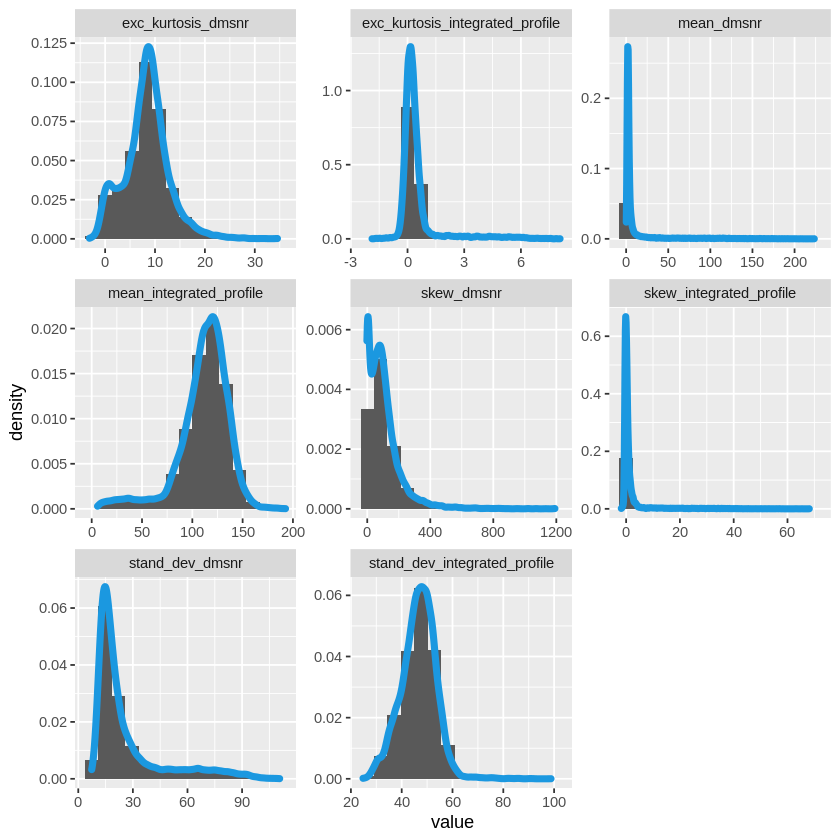

In [100]:
ggp3 <- ggplot(pulsar_train_dist, aes(x = value)) +    # Draw histogram & density
  geom_histogram(aes(y = ..density..),bins=15) + 
  geom_density(col = "#1b98e0", size = 2) + 
  facet_wrap(~ name, scales = "free")
ggp3